In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
fcdata=pd.read_csv(r"C:\Users\HP\Downloads\Fraud_check (1).csv")
fcdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:

fcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
fcdata.shape

(600, 6)

In [5]:
fcdata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fcdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
newdata = pd.DataFrame(fcdata)
newdata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
data = newdata.rename(columns= {"Marital.Status" : "marital_status", "Taxable.Income" : "tax_income", "City.Population" : "city_population",
         "Work.Experience" : "work_ex"}, inplace = True)

In [9]:
newdata

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
newdata["tax_status"] = np.where(newdata['tax_income']<=30000,'Risky','Good') 
newdata.head()

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
newdata.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [12]:
newdata.drop(['tax_income', 'city_population'], axis=1, inplace= True)
newdata

,Undergrad,marital_status,work_ex,Urban,tax_status
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder()

In [15]:
newdata['Undergrad']= label.fit_transform(newdata['Undergrad']) 
newdata['marital_status']= label.fit_transform(newdata['marital_status']) 
newdata['Urban']= label.fit_transform(newdata['Urban'])
newdata.head()

,Undergrad,marital_status,work_ex,Urban,tax_status
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good


In [16]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int32 
 1   marital_status  600 non-null    int32 
 2   work_ex         600 non-null    int64 
 3   Urban           600 non-null    int32 
 4   tax_status      600 non-null    object
dtypes: int32(3), int64(1), object(1)
memory usage: 16.5+ KB


In [17]:
X = newdata.iloc[:,:4]
X

,Undergrad,marital_status,work_ex,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [18]:
Y = newdata.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [19]:
newdata.tax_status.value_counts()

tax_status
Good     476
Risky    124
Name: count, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [20]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
model.get_n_leaves()

7

In [23]:
preds = model.predict(X_test)  
pd.Series(preds).value_counts()

Good    120
Name: count, dtype: int64

In [24]:
np.mean(preds==Y_test)

0.7666666666666667

# Visualize

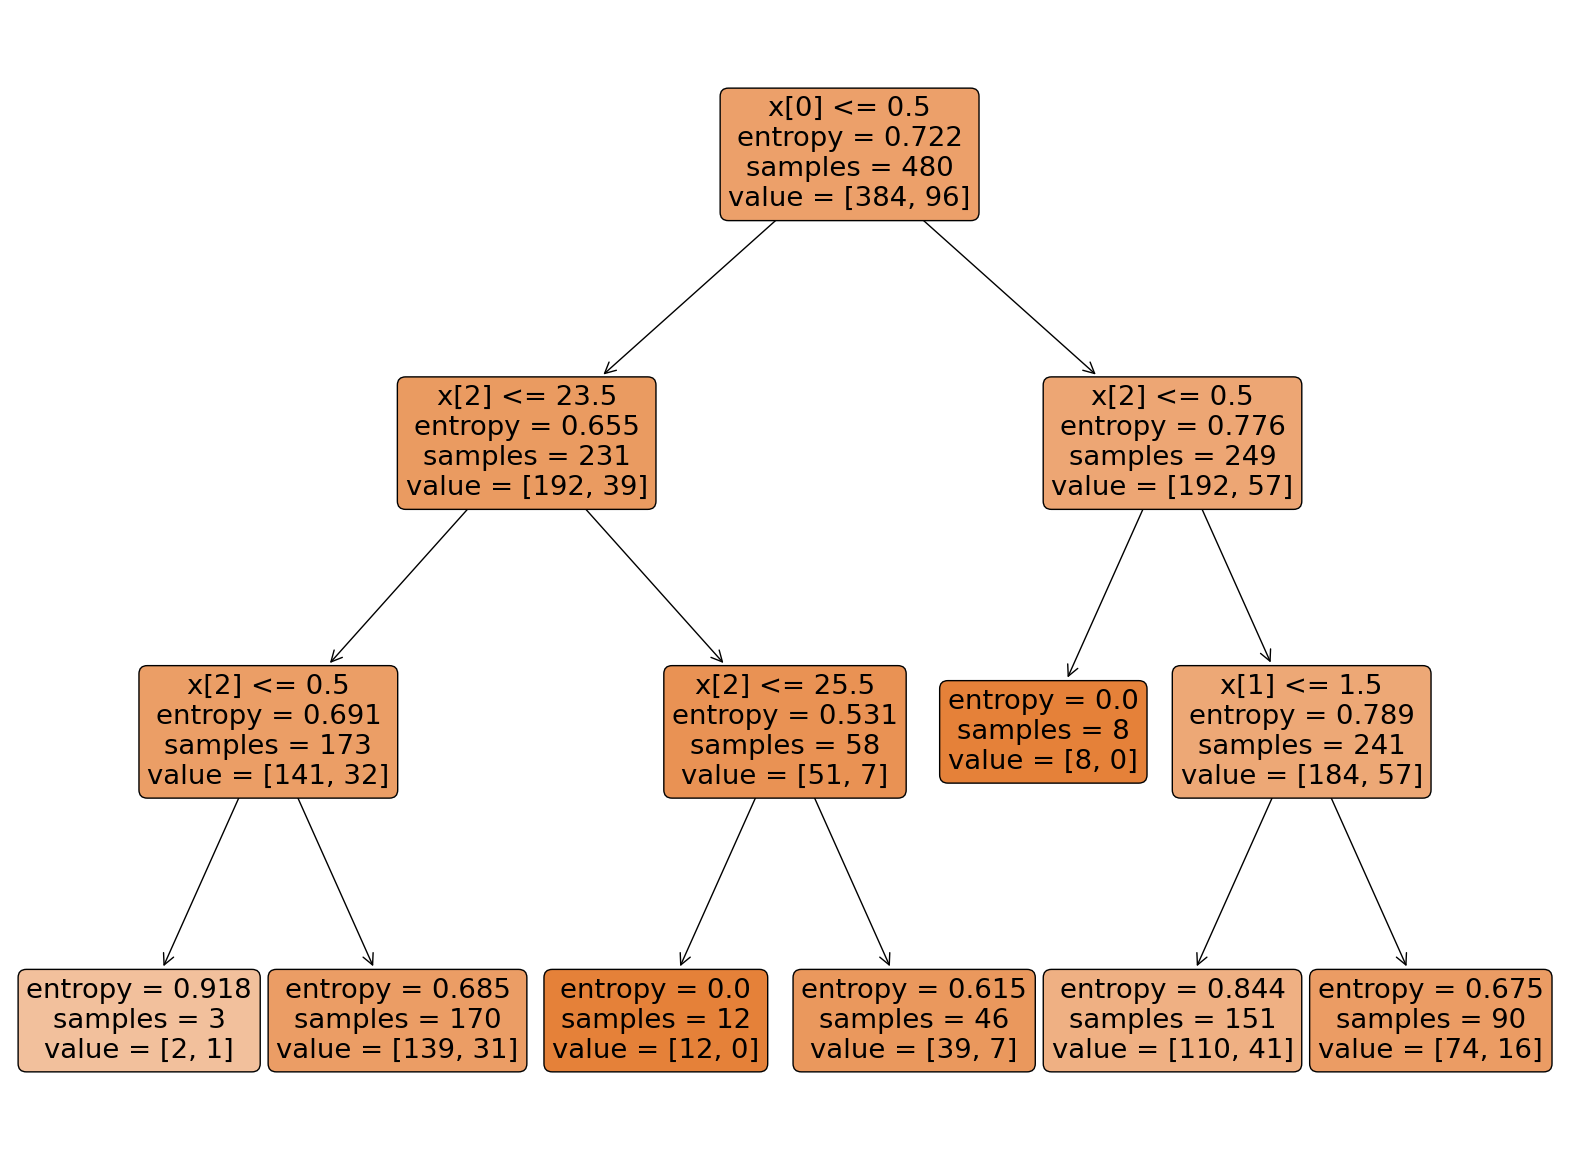

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plot_tree(model,rounded = True,filled = True)
plt.show()

In [26]:
pd.crosstab(Y_test,preds)

col_0,Good
tax_status,
Good,92
Risky,28


In [27]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



# Building Decision Tree Classifier (CART) using Gini Criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
pred=model_gini.predict(X_test)
np.mean(pred==Y_test)

0.7666666666666667

In [31]:
model_gini.get_n_leaves()

8

In [32]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



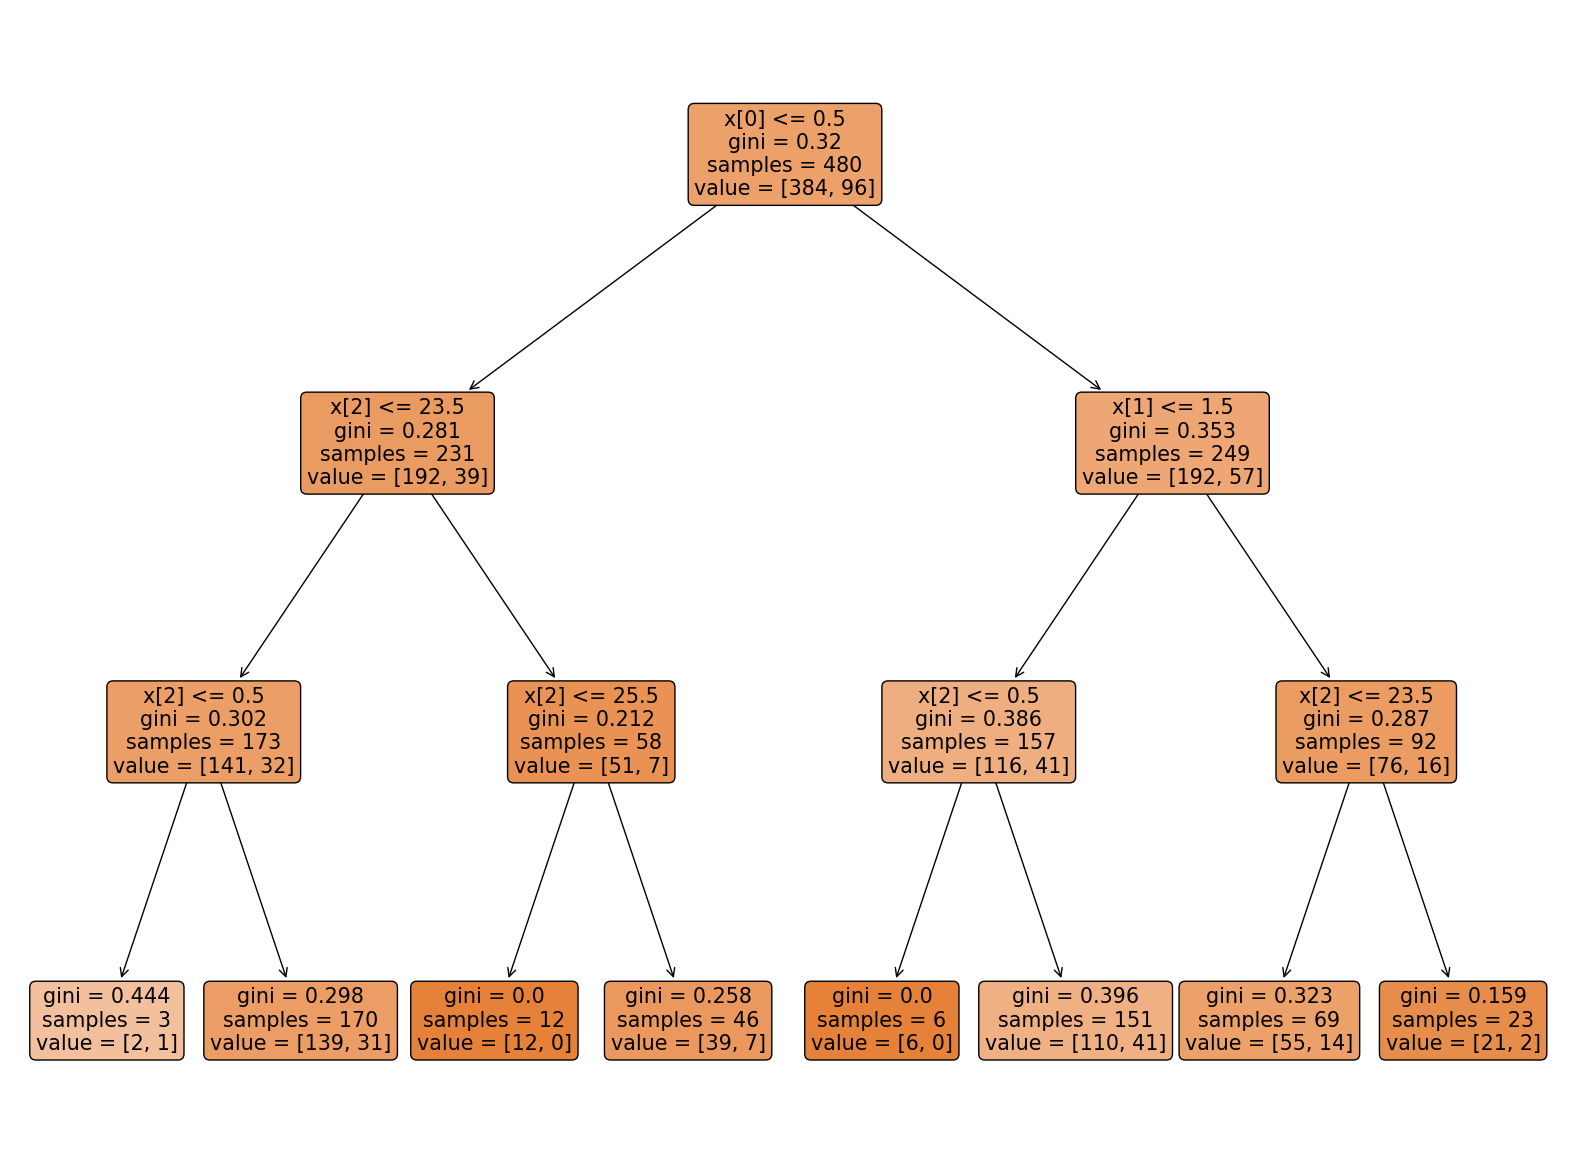

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plot_tree(model_gini,rounded = True,filled = True)
plt.show()

# For Company Data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [35]:
cdata=pd.read_csv(r"C:\Users\HP\Downloads\Company_Data.csv")
cdata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [36]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [37]:
cdata.shape

(400, 11)

In [38]:
cdata.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [39]:

cdata.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [40]:
newdata = pd.DataFrame(cdata)
newdata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Convert Target Variable to Categorical Variable

In [41]:
newdata["Sales"] = np.where(newdata['Sales']>=5,'Yes','No') 
newdata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,Yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Yes,117,100,4,466,97,Medium,55,14,Yes,Yes
4,No,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
newdata.Sales.unique()

array(['Yes', 'No'], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label=LabelEncoder()

In [45]:
newdata['Sales']= label.fit_transform(newdata['Sales']) 
newdata['ShelveLoc']= label.fit_transform(newdata['ShelveLoc']) 
newdata['Urban']= label.fit_transform(newdata['Urban'])
newdata['US']= label.fit_transform(newdata['US'])

In [46]:
newdata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [47]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int32
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.3 KB


In [48]:
X = newdata.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [49]:
Y = newdata.iloc[:,0]
Y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int32

In [50]:
newdata.Sales.value_counts()

Sales
1    323
0     77
Name: count, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [51]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [52]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
model.get_n_leaves()

7

In [54]:
preds = model.predict(X_test) 
pd.Series(preds).value_counts()

1    76
0     4
Name: count, dtype: int64

In [55]:
np.mean(preds==Y_test)

0.75

# Visualize

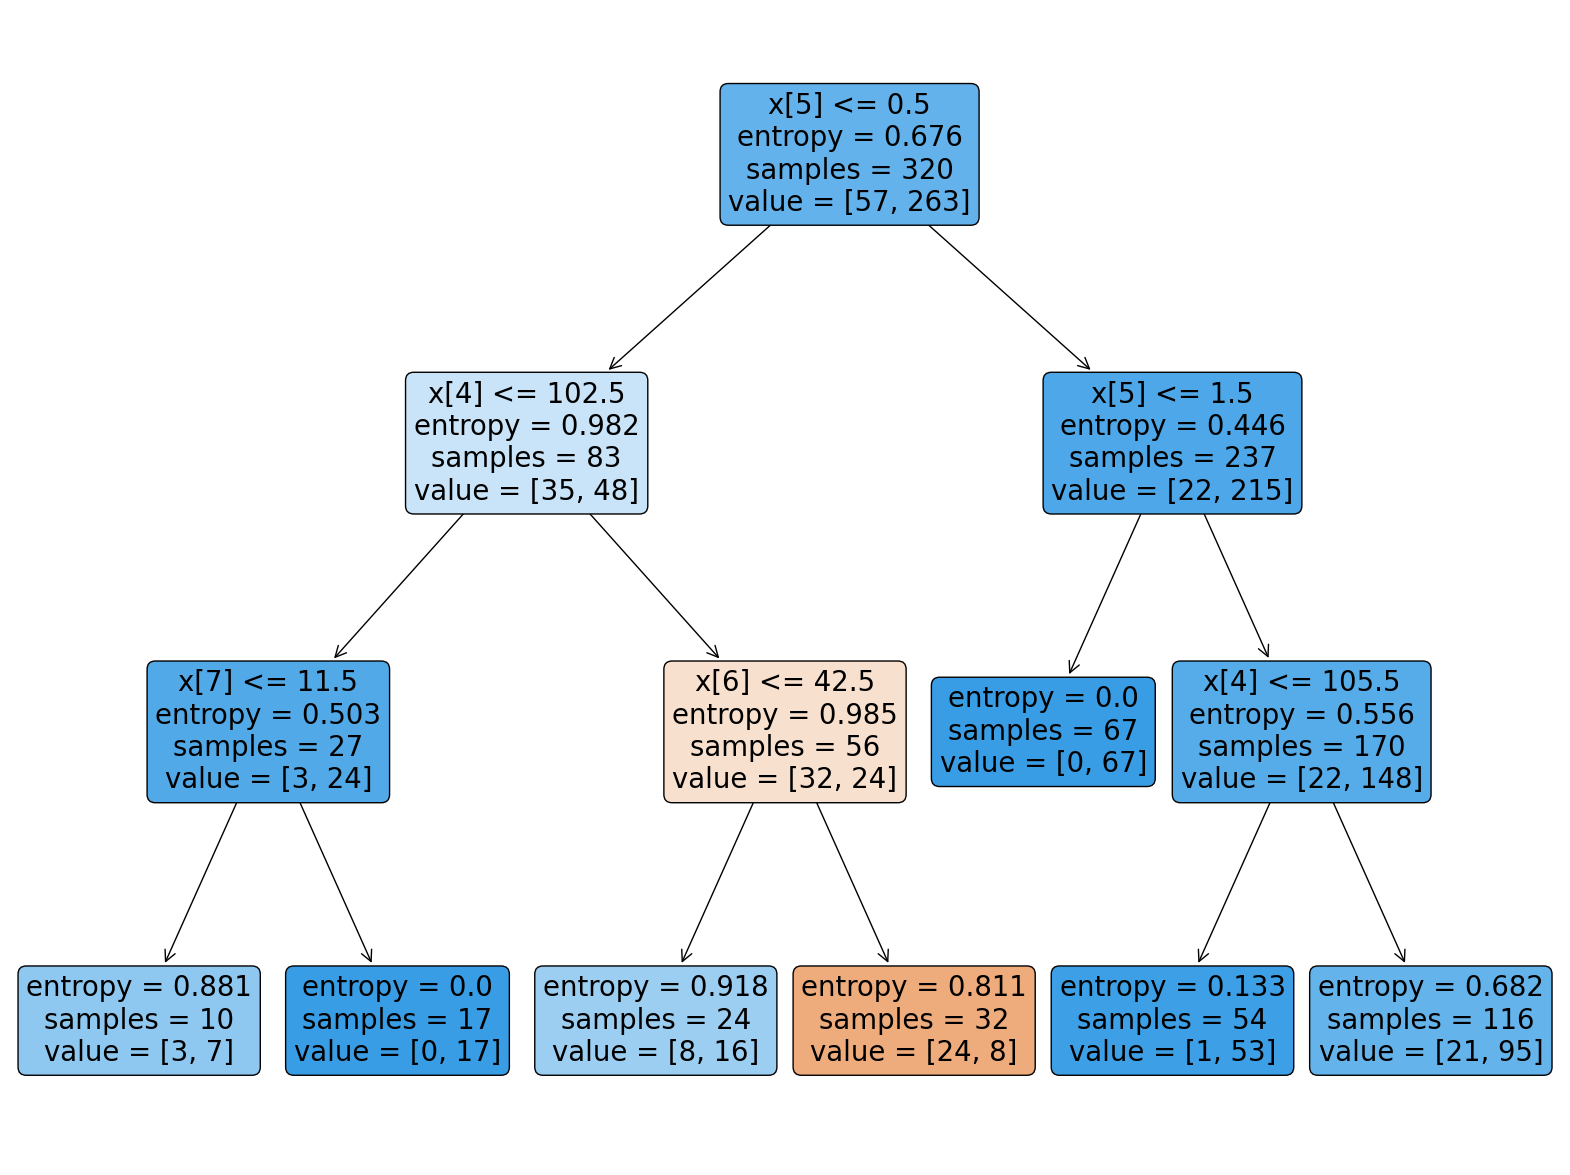

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plot_tree(model,rounded = True,filled = True)
plt.show()

In [57]:
pd.crosstab(Y_test,preds) 

col_0,0,1
Sales,,
0,2,18
1,2,58


In [58]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.10      0.50      0.17         4
           1       0.97      0.76      0.85        76

    accuracy                           0.75        80
   macro avg       0.53      0.63      0.51        80
weighted avg       0.92      0.75      0.82        80



# Building Decision Tree Classifier (CART) using Gini Criteria

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [60]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
pred=model_gini.predict(X_test)
np.mean(pred==Y_test)

0.8375

In [62]:
model_gini.get_n_leaves()

8

In [63]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.45      0.82      0.58        11
           1       0.97      0.84      0.90        69

    accuracy                           0.84        80
   macro avg       0.71      0.83      0.74        80
weighted avg       0.90      0.84      0.86        80



# Visualize

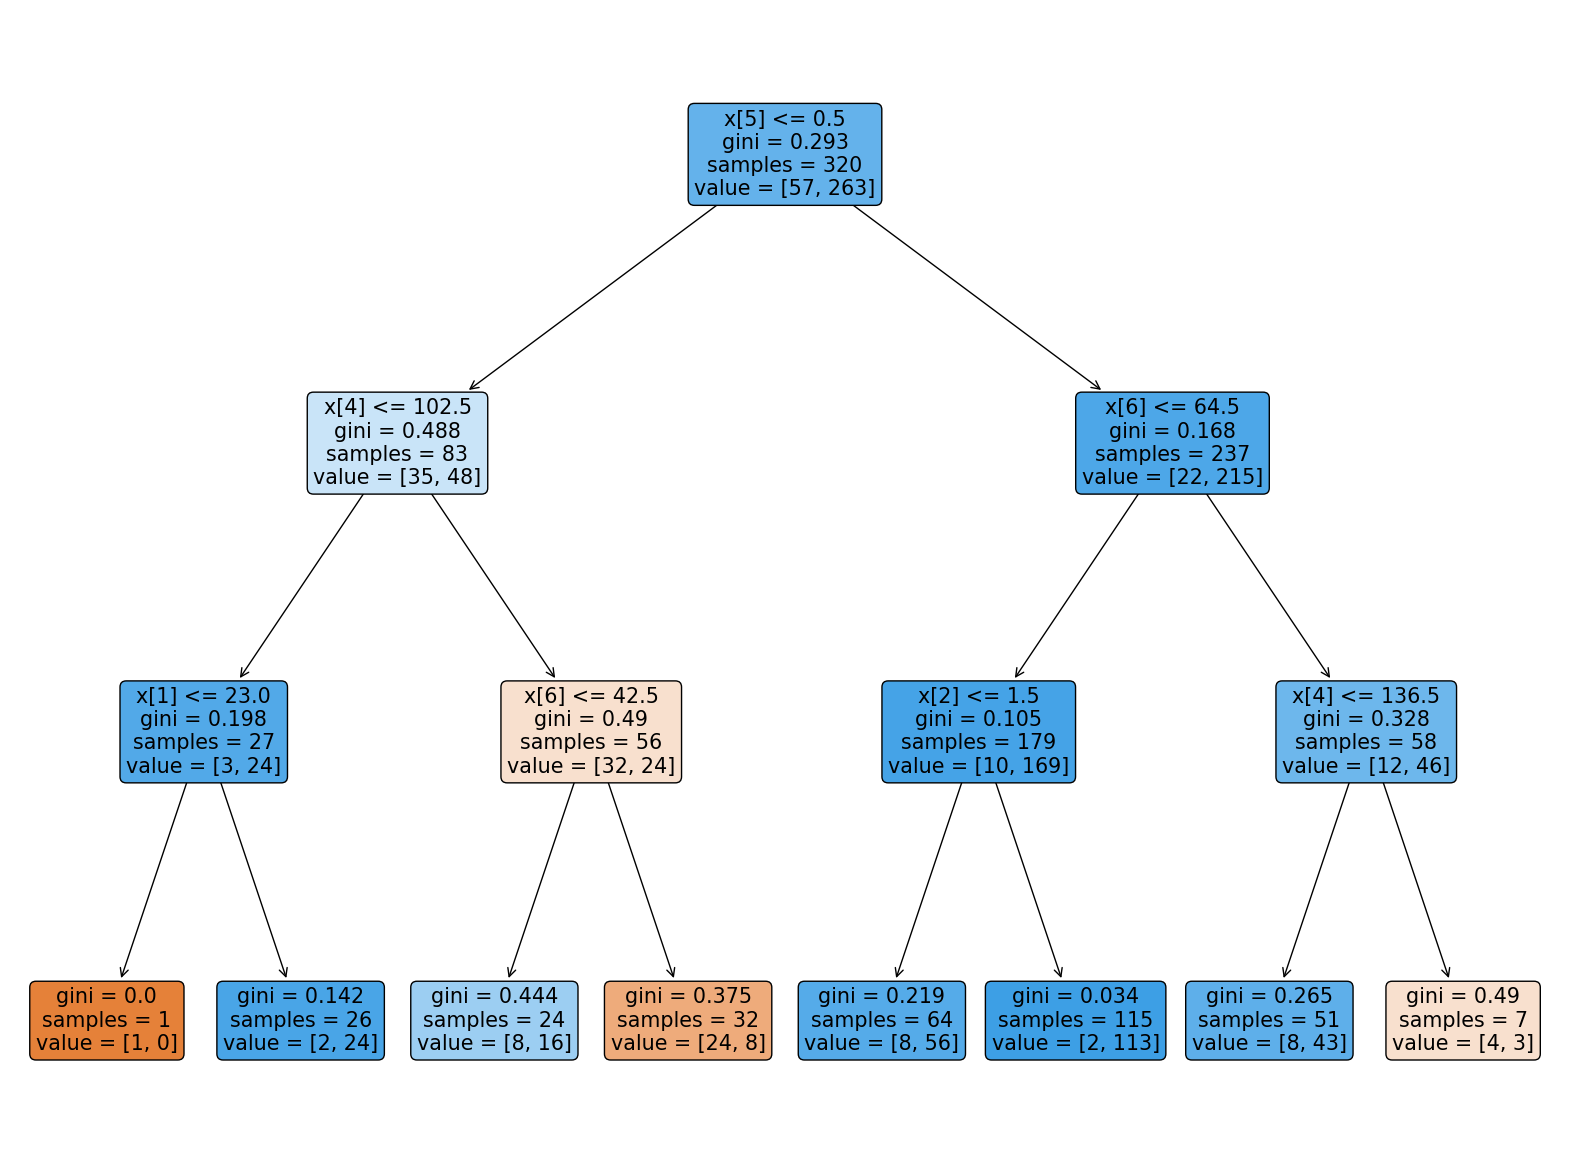

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plot_tree(model_gini,rounded = True,filled = True)
plt.show()

# The END !!!